In [1]:
%matplotlib inline

from os import path, getcwd, listdir
from nltk.corpus import stopwords
import collections
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PATH_TO_DATA = path.join(getcwd(), 'data/cs276')

In [3]:
# Index all file to be able to retrieve them
def create_file_index():
    file_index_dict = {}
    current_file_index = 0
    for directory_index in range(9):
        path_directory = path.join(PATH_TO_DATA, str(directory_index))
        for filename in listdir(path_directory):
            file_index_dict[current_file_index] = filename
            current_file_index += 1
    return file_index_dict


# Save file index
def save_file_index(file_index):
    with open('file_index.txt', 'w') as file:
        for index, filename in file_index.items():
            file.write("{} {}\n".format(index, filename))


# Load file index
def load_file_index(path_to_file_index):
    file_index_dict = {}
    with open(path_to_file_index, 'r') as file:
        for line in file.readlines():
            line = line.split(' ')
            file_index_dict[int(line[0])] = line[1].rstrip('\n')
    return file_index_dict

# Create the Collection

Il faut extraire d'abord les tokens de la collection (tout en enlevant certains termes - comme les nombres, on a remarqué également des termes avec des caractères spéciaux comme des _, +...).

Il faut ensuite enlever les stopwords : 2 possibilités s'offrent à nous, à savoir : 

- Utiliser la librairie nltk et enlever tous les mots contenus dans la liste de stopwords (environ une 10aine de mots)

- Récupérer les mots les plus fréquents et les retirer de la collection

Après analyse des différentes options, nous avons décider de retirer les 30 mots les plus fréquents de la collection

In [7]:
stopwords_list = stopwords.words('english')

def count_frequency(collection):
    tokens_count = collections.Counter()
    for list_tokens in collection.values():
        tokens_count.update(list_tokens)
    return tokens_count


def only_alpha(s):
    return s.isalpha()

def create_collection():
    current_file_index = 0
    collection = {}
    for i in range(9):
        path_directory = path.join(PATH_TO_DATA, str(i))
        for filename in listdir(path_directory):
            path_to_file = path.join(path_directory, filename)
            with open(path_to_file, 'r') as file:
                tokens = []
                for line in file.readlines():
                    tokens.extend(line.rstrip('\n').split(' '))
                filtered_tokens = list(filter(only_alpha, tokens))
            collection[current_file_index] = filtered_tokens
            current_file_index += 1
    return collection

In [8]:
standford_collection = create_collection()
frequencies = count_frequency(standford_collection)
most_common_words = list(map(lambda x: x[0], frequencies.most_common(30)))

In [9]:
standford_collection

{0: ['matthew',
  'lippi',
  'people',
  'the',
  'stanford',
  'biomaterials',
  'and',
  'advanced',
  'drug',
  'delivery',
  'bioadd',
  'stanford',
  'medicine',
  'stanford',
  'school',
  'of',
  'medicine',
  'biomaterials',
  'and',
  'advanced',
  'drug',
  'delivery',
  'search',
  'this',
  'site',
  'only',
  'stanford',
  'medical',
  'sites',
  'ways',
  'to',
  'give',
  'find',
  'a',
  'person',
  'alumni',
  'lane',
  'library',
  'ways',
  'to',
  'give',
  'find',
  'a',
  'person',
  'matthew',
  'lippi',
  'predoctoral',
  'scientist',
  'lab',
  'manager',
  'email',
  'mlippi',
  'stanford',
  'edu',
  'mlippi',
  'matt',
  'studied',
  'biology',
  'as',
  'an',
  'undergraduate',
  'at',
  'university',
  'of',
  'california',
  'irvine',
  'and',
  'in',
  'addition',
  'to',
  'acting',
  'as',
  'lab',
  'manager',
  'he',
  'assists',
  'in',
  'development',
  'and',
  'fabrication',
  'of',
  'microneedles',
  'breathable',
  'particles',
  'and',
  'ot

Text(0.5, 1.0, 'Most Common Tokens in the Standford Corpus')

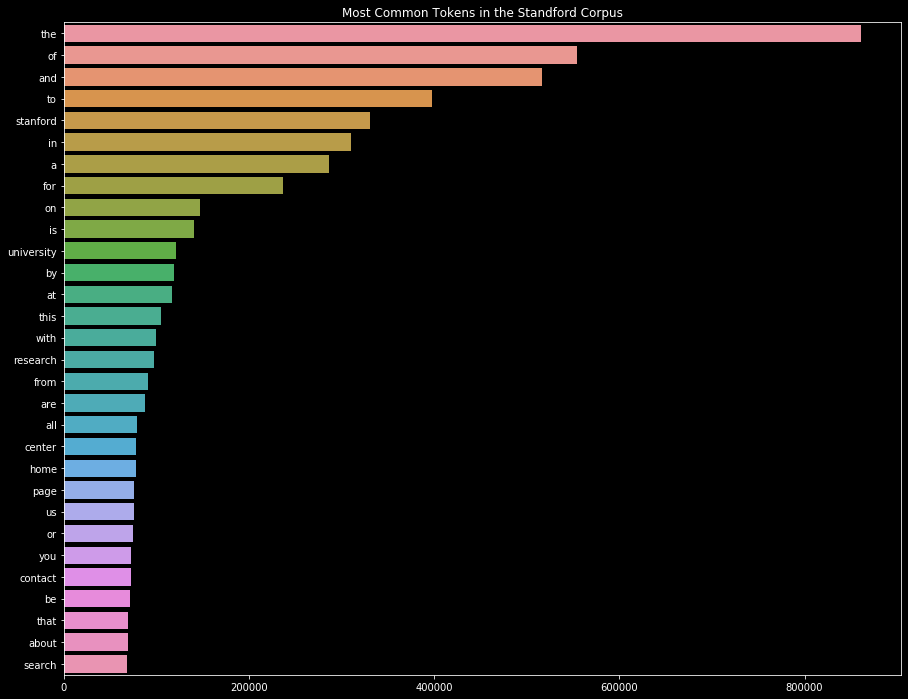

In [23]:
corpus_common_words = [word[0] for word in frequencies.most_common(30)]
corpus_common_counts = [word[1] for word in frequencies.most_common(30)]

plt.style.use('dark_background')
plt.figure(figsize=(15, 12))

sns.barplot(x=corpus_common_counts,y=corpus_common_words)
plt.title('Most Common Tokens in the Standford Corpus')

In [32]:
def remove_stop_words(collection, stopwords):
    for id, list_of_words in collection.items():
        new_list = []
        for word in list_of_words:
            if word not in stopwords:
                new_list.append(word)
        collection[id] = new_list
    return collection

collection_without_stopwords = remove_stop_words(standford_collection, most_common_words)

In [33]:
collection_without_stopwords

{0: [],
 1: [],
 2: [],
 3: [],
 4: [],
 5: [],
 6: [],
 7: [],
 8: [],
 9: [],
 10: [],
 11: [],
 12: [],
 13: [],
 14: [],
 15: [],
 16: [],
 17: [],
 18: [],
 19: [],
 20: [],
 21: [],
 22: [],
 23: [],
 24: [],
 25: [],
 26: [],
 27: [],
 28: [],
 29: [],
 30: [],
 31: [],
 32: [],
 33: [],
 34: [],
 35: [],
 36: [],
 37: [],
 38: [],
 39: [],
 40: [],
 41: [],
 42: [],
 43: [],
 44: [],
 45: [],
 46: [],
 47: [],
 48: [],
 49: [],
 50: [],
 51: [],
 52: [],
 53: [],
 54: [],
 55: [],
 56: [],
 57: [],
 58: [],
 59: [],
 60: [],
 61: [],
 62: [],
 63: [],
 64: [],
 65: [],
 66: [],
 67: [],
 68: [],
 69: [],
 70: [],
 71: [],
 72: [],
 73: [],
 74: [],
 75: [],
 76: [],
 77: [],
 78: [],
 79: [],
 80: [],
 81: [],
 82: [],
 83: [],
 84: [],
 85: [],
 86: [],
 87: [],
 88: [],
 89: [],
 90: [],
 91: [],
 92: [],
 93: [],
 94: [],
 95: [],
 96: [],
 97: [],
 98: [],
 99: [],
 100: [],
 101: [],
 102: [],
 103: [],
 104: [],
 105: [],
 106: [],
 107: [],
 108: [],
 109: [],
 110: [],
